## **Resolvendo problemas de ciência de dados do mundo real com Python Pandas!**


Este projeto tem por objetivo utilizar Python, Pandas e Matplotlib para limpar, pré-processar e explorar dados de vendas de um e-commerce americano especializado em tecnologia, a fim de extrair respostas e significados para responder problemas do mundo real. Este projeto não tem por objetivo ser algo profissional, é mais uma conversa interna na qual busco aprender e ganhar experiência com Pandas e Matplotlib, então não estranhe a informalidade dos comentários e texto abaixo.

**Importando bibliotecas**

In [5]:
#Importando bibliotecas
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

**Atividade: Unifique os 12 meses de vendas(dados), em um único documendo CSV**

Os documentos do dataset estão divididos por mês, é necessário fazer a unificação em um único dataframe.

*Google e stack overflow são seus melhores amigos, USE-OS!*

In [6]:
"Para fazer a leitura de um documento único CSV (Comma separated value)"
"df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Sales analysis with Python and Pandas!/Sales_Data/Sales_April_2019.csv')"
"df.head()"

'df.head()'

Primeiro, se há dúvida, pesquise:

**read all files in a directory python**

Link útil: https://stackoverflow.com/questions/3207219/how-do-i-list-all-files-of-a-directory

Pesquisa, implementa, testa até conseguir, passa pra frente e repete.

2 passo: **How do you concatenate dataframes in pandas?**

Link útil: https://pandas.pydata.org/docs/reference/api/pandas.concat.html


In [7]:
#Listando todos os documentos de um diretório. (Passa o caminho do diretório)
files = [file for file in os.listdir('/content/drive/MyDrive/Colab Notebooks/Sales analysis with Python and Pandas!/Sales_Data')]

#Exibindo
print('LISTA DE ARQUIVOS NO DIRETÓRIO\n')
for file in files:
  print(file)

#Agora precisamos pegar todos esses documentos e concatená-los

print('\n\n\n')

#Criando um dataframe novo e vazio:
all_months_data = pd.DataFrame()

'''
Resumindo:
Cria um loop com for passando por cada documento em uma pasta (file in files)
Dentro do loop, em cada round, df terá o nome do documento da vez e irá concatenar
em all_months_data. Leia o código:
'''

for file in files:
  df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Sales analysis with Python and Pandas!/Sales_Data/"+file)
  all_months_data = pd.concat([all_months_data, df])

#Salvando em um documento, retirando o index
all_months_data.to_csv("All_data.csv", index=False)


LISTA DE ARQUIVOS NO DIRETÓRIO

Sales_November_2019.csv
Sales_August_2019.csv
Sales_October_2019.csv
Sales_June_2019.csv
Sales_July_2019.csv
Sales_May_2019.csv
Sales_February_2019.csv
Sales_January_2019.csv
Sales_April_2019.csv
Sales_September_2019.csv
Sales_March_2019.csv
Sales_December_2019.csv






In [8]:
#Apenas para demonstrar a leitura do documento concatenado, salvo anteriormente.
all_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Sales analysis with Python and Pandas!/All_data.csv')

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,278797,Wired Headphones,1,11.99,11/21/19 09:54,"46 Park St, New York City, NY 10001"
1,278798,USB-C Charging Cable,2,11.95,11/17/19 10:03,"962 Hickory St, Austin, TX 73301"
2,278799,Apple Airpods Headphones,1,150.0,11/19/19 14:56,"464 Cherry St, Los Angeles, CA 90001"
3,278800,27in FHD Monitor,1,149.99,11/25/19 22:24,"649 10th St, Seattle, WA 98101"
4,278801,Bose SoundSport Headphones,1,99.99,11/09/19 13:56,"522 Hill St, Boston, MA 02215"


#**Questão 1:** Qual o melhor mês de vendas, quanto se ganhou nesse mês?

Primeiramente, observando os dados, vemos que podemos adicionar algumas colunas com informações que sejam facilitadoras. Por exemplo: podemos adicionar uma coluna "Mês" que irá retornar o número ou nome do mês na qual a venda foi feita, a priori temos apenas a data da venda, mas não o mês. Posteriormente veremos que será necessário também criar uma nova coluna que seja a multiplicação do valor da venda (Quantity Ordered * Price Each) que irá facilitar nossas contas.

**Atividade: criando colunas adicionais**

#### Coluna Mês

In [9]:
'''
Para criar uma nova coluna basicamente podemos escrever: all_data['nome da nova coluna'] = ...
Neste caso a nova coluna "Month" receberá os valores da coluna Order Date,como Order date é uma string, 
que também pode ser lida como uma lista, teremos por exemplo: 01/02/2019 [0, 1, /, 0, 2, /, 2, 0, 1, 9],
como queremos apenas o mes, e no formato americano, mês vem primeiro, então queremos os 2 primeiros itens da lista
[0:2] excluíndo o 2(terceiro item). Isso todo em .str, ou seja, formato string.

'''
all_data['Month'] = all_data['Order Date'].str[0:2]

In [10]:
#convertendo para formato int

#all_data['Month'] = all_data['Month'].astype('int32')

#Rodando a linha acima teremos o seguinte erro: ValueError: cannot convert float NaN to integer
#Ou seja, temos valores faltantes, missing values ou NAN.
#VAMOS PARA A LIMPEZA!

####**Limpeza!**

**Limpando linhas com valores NaN**

Pergunta: Find rows with NaN pandas

Link: https://stackoverflow.com/questions/43424199/display-rows-with-one-or-more-nan-values-in-pandas-dataframe

In [11]:
#nan_df irá receber como entrada os valores de colunas (axis=1) com valores NaN.
nan_df = all_data[all_data.isna().any(axis=1)]
nan_df.head()

#Abaixo temos o comando .dropna, que vai basicamente deletar cada linha que houver NaN, o parâmetro 'how' recebe valores como "any" 
#para deletar linhas que tenham pelo menos 1 NaN ou "all", que vai deletar linhas que tiverem todos os valores NaN,  no nosso caso 
# quando há 1 NaN todos são, entao usaremos o "all"
all_data = all_data.dropna(how='all')

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,278797,Wired Headphones,1,11.99,11/21/19 09:54,"46 Park St, New York City, NY 10001",11
1,278798,USB-C Charging Cable,2,11.95,11/17/19 10:03,"962 Hickory St, Austin, TX 73301",11
2,278799,Apple Airpods Headphones,1,150.0,11/19/19 14:56,"464 Cherry St, Los Angeles, CA 90001",11
3,278800,27in FHD Monitor,1,149.99,11/25/19 22:24,"649 10th St, Seattle, WA 98101",11
4,278801,Bose SoundSport Headphones,1,99.99,11/09/19 13:56,"522 Hill St, Boston, MA 02215",11


Momento da verdade, repetiremos o código que deu erro anteriormente.

In [12]:
#convertendo para formato int

#all_data['Month'] = all_data['Month'].astype('int32')

#Obs, usamos int32 pq o número é pequeno, 32 é bits, tamanho do dado.

#Aqui temos mais erros...
#ValueError: invalid literal for int() with base 10: 'Or'
#Ou seja, na coluna "Month" está aparecendo esse Or, que veio de Order Date, vamos procurar o que pode ser e limpar mais!
#VAMOS PARA A LIMPEZA!

**Encontre o "Or" e delete!**

In [13]:
#Primeiramente, para encontrar o Or temos que, em all_data[Order Date], aplicar uma condição em que os dois primeiros valores sejam iguais a Or
df_temporario = all_data[all_data['Order Date'].str[0:2] == 'Or']
df_temporario.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
1172,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
1519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
1620,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
1726,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
1891,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or


In [14]:
#O bloco acima foi basicamente para mostrar o que estava errado, para solucionar é bem simples:
#Iremos simplesmente colocar como nova base de dados para all_data todas as linhas em que
# Order Date, nos dois primeiro caracteres, seja diferente de Or.
all_data = all_data[all_data['Order Date'].str[0:2] != 'Or']

**Mais uma vez tentando converter!!**

In [15]:
#convertendo para formato int

all_data['Month'] = all_data['Month'].astype('int32')
all_data.head()
#NICE, WE DID IT!

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,278797,Wired Headphones,1,11.99,11/21/19 09:54,"46 Park St, New York City, NY 10001",11
1,278798,USB-C Charging Cable,2,11.95,11/17/19 10:03,"962 Hickory St, Austin, TX 73301",11
2,278799,Apple Airpods Headphones,1,150.0,11/19/19 14:56,"464 Cherry St, Los Angeles, CA 90001",11
3,278800,27in FHD Monitor,1,149.99,11/25/19 22:24,"649 10th St, Seattle, WA 98101",11
4,278801,Bose SoundSport Headphones,1,99.99,11/09/19 13:56,"522 Hill St, Boston, MA 02215",11


#### **Obs, a maneira que eu estou organizando o código é de forma temporal, os problemas vão aparecendo e vou colocando bloco por bloco, claramente a melhor forma é pegar toda limpeza e colocar antes da questão 1, mas retiraria o fator "Primeiro aparece o problema, depois procuramos a solução", e ficaria tudo bonitinho demais.**

#### Coluna Vendas

In [16]:
#Aqui iremos criar uma nova coluna "Sales", que será a multiplicação de "Quantity Ordered" por "Price Each".
#Pandas é tão massa que vc n precisa fazer um for para iterar cara item de cada coluna, ele já agrega por linha, na coluna nova.
#Porém teremos um erro abaixo, pois os valores estão em string.

#all_data['Sales'] = all_data['Quantity Ordered'] * all_data["Price Each"]

#TypeError: can't multiply sequence by non-int of type 'str'

Mais conversão...

In [17]:
#Aqui utilizaremos outra maneira, mais simples, de conversão.
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered']) #Para int
all_data['Price Each'] = pd.to_numeric(all_data['Price Each']) # Para int

In [18]:
all_data['Sales'] = all_data['Quantity Ordered'] * all_data["Price Each"]
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,278797,Wired Headphones,1,11.99,11/21/19 09:54,"46 Park St, New York City, NY 10001",11,11.99
1,278798,USB-C Charging Cable,2,11.95,11/17/19 10:03,"962 Hickory St, Austin, TX 73301",11,23.90
2,278799,Apple Airpods Headphones,1,150.00,11/19/19 14:56,"464 Cherry St, Los Angeles, CA 90001",11,150.00
3,278800,27in FHD Monitor,1,149.99,11/25/19 22:24,"649 10th St, Seattle, WA 98101",11,149.99
4,278801,Bose SoundSport Headphones,1,99.99,11/09/19 13:56,"522 Hill St, Boston, MA 02215",11,99.99


Respondendo a questão

In [19]:
#Agrupando os valores por mês, fazendo a somatória e pegando a coluna 'Sales' e inserindo em uma variável
results = all_data.groupby('Month').sum()['Sales']

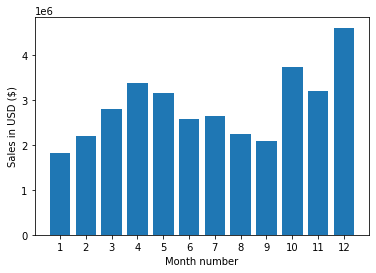

In [20]:
#Deixando bonitinho e plotando um gráfico =D

months = range(1,13)
plt.bar(months, results)
plt.xticks(months)
plt.ylabel("Sales in USD ($)")
plt.xlabel("Month number")
plt.show()

É importante pensar no que levou cada mês a ter tais resultados, o que motivou dezembro a ter o maior número de vendas, assim como abril... "Mais propaganda?", "datas comemorativas?"... Fazer as perguntas certas e encontrar correlações entre os dados possuídos.

#**Questão 2:** Qual cidade teve o maior número de vendas?

**Atividade: Adicione uma coluna "cidade"**

In [21]:
#Usaremos a função .apply() para aplicar uma função em toda a coluna Puchase Adress, perceba que o endereço é dividido em 3 partes, por vírgulas.
#E para dividir essa string, usaremos o .split(), mais especificamente .split(','), que irá separar a string em uma lista com 3 itens.
#Ex: "46 Park St, New York City, NY 10001" >>> ["46 Park St", "New York City", "NY 10001"], pegaremos o item 1 e adicionaremos à nova coluna.

all_data["Column"] = all_data['Purchase Address'].apply(lambda x: x.split(',')[1])

#Outra forma:
#def get_city(address):
#    return address.split(',')[1]
#
#all_data["Column"] = all_data['Purchase Address'].apply(lambda x :get_city(x) )

#(lambda x: x.split(',')[1]) quer dizer, aplicaremos para cada x, um x.split com vírgulas como separadores, e pegaremos o segundo item
# x é cada item em Purchase Address, lambda é uma função temporária que será usada em cada linha da coluna, como se estivesse em um "for".

#APPLY É LINDO

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,Column
0,278797,Wired Headphones,1,11.99,11/21/19 09:54,"46 Park St, New York City, NY 10001",11,11.99,New York City
1,278798,USB-C Charging Cable,2,11.95,11/17/19 10:03,"962 Hickory St, Austin, TX 73301",11,23.90,Austin
2,278799,Apple Airpods Headphones,1,150.00,11/19/19 14:56,"464 Cherry St, Los Angeles, CA 90001",11,150.00,Los Angeles
3,278800,27in FHD Monitor,1,149.99,11/25/19 22:24,"649 10th St, Seattle, WA 98101",11,149.99,Seattle
4,278801,Bose SoundSport Headphones,1,99.99,11/09/19 13:56,"522 Hill St, Boston, MA 02215",11,99.99,Boston


In [22]:
#Renomeando a coluna
all_data.rename(columns={'Column': 'City'})
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,Column
0,278797,Wired Headphones,1,11.99,11/21/19 09:54,"46 Park St, New York City, NY 10001",11,11.99,New York City
1,278798,USB-C Charging Cable,2,11.95,11/17/19 10:03,"962 Hickory St, Austin, TX 73301",11,23.90,Austin
2,278799,Apple Airpods Headphones,1,150.00,11/19/19 14:56,"464 Cherry St, Los Angeles, CA 90001",11,150.00,Los Angeles
3,278800,27in FHD Monitor,1,149.99,11/25/19 22:24,"649 10th St, Seattle, WA 98101",11,149.99,Seattle
4,278801,Bose SoundSport Headphones,1,99.99,11/09/19 13:56,"522 Hill St, Boston, MA 02215",11,99.99,Boston


In [23]:
#Temos um problema com a questão das cidades, podemos ter diferentes cidades com o mesmo nome, então para isso, adicionaremos à nova coluna o estado
#a qual tal cidade pertence. Perceba que teremos que fazer um outros split dentro do primeiro, para separar estado de zip code.
#Ex: 46 Park St, New York City, NY 10001, quando fazemos o primeiro split >> x.split(',')[2] irá retornar " NY 10001" então
#faremos o segundo split, separando por espaço, e como existe um espaço logo no começo "*ESPAÇO*NY*ESPAÇO*10001", pegaremos o segundo item.
#Retornará essa beleza: New York City NY

all_data["City"] = all_data['Purchase Address'].apply(lambda x: x.split(',')[1] + ' ' + x.split(',')[2].split(' ')[1])

#ou:
#def get_state(address):
#    return address.split(',')[2].split(' ')[1]
# 
# all_data["City"] = all_data['Purchase Address'].apply(lambda x :get_city(x) + ' ' + get_state(x))

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,Column,City
0,278797,Wired Headphones,1,11.99,11/21/19 09:54,"46 Park St, New York City, NY 10001",11,11.99,New York City,New York City NY
1,278798,USB-C Charging Cable,2,11.95,11/17/19 10:03,"962 Hickory St, Austin, TX 73301",11,23.90,Austin,Austin TX
2,278799,Apple Airpods Headphones,1,150.00,11/19/19 14:56,"464 Cherry St, Los Angeles, CA 90001",11,150.00,Los Angeles,Los Angeles CA
3,278800,27in FHD Monitor,1,149.99,11/25/19 22:24,"649 10th St, Seattle, WA 98101",11,149.99,Seattle,Seattle WA
4,278801,Bose SoundSport Headphones,1,99.99,11/09/19 13:56,"522 Hill St, Boston, MA 02215",11,99.99,Boston,Boston MA


In [24]:
#O velho e bom groupby para responder a questão:

city_results = all_data.groupby('City').sum()
city_results

,Quantity Ordered,Price Each,Month,Sales
City,,,,
Atlanta GA,16602,2.779908e+06,104794,2.795499e+06
Austin TX,11153,1.809874e+06,69829,1.819582e+06
Boston MA,22528,3.637410e+06,141112,3.661642e+06
Dallas TX,16730,2.752628e+06,104620,2.767975e+06
Los Angeles CA,33289,5.421435e+06,208325,5.452571e+06
New York City NY,27932,4.635371e+06,175741,4.664317e+06
Portland ME,2750,4.471893e+05,17144,4.497583e+05
Portland OR,11303,1.860558e+06,70621,1.870732e+06
San Francisco CA,50239,8.211462e+06,315520,8.262204e+06


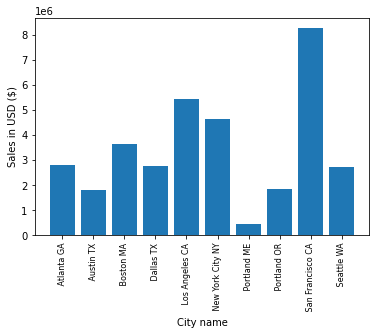

In [25]:
#Note que teremos que ordenar os valores e cidades, senão teremos um gráfico em que as colunas não baterão com os labels indicados.

#cities = all_data["City"].unique()                                   
cities = [city for city, df in all_data.groupby('City')]             

#Basicamente estamos criando uma lista de cidades encima do groupby criado anteriormente para city_results, então a ordem baterá!

plt.bar(cities, city_results['Sales'])
plt.xticks(cities, rotation = "vertical", size = 8)
plt.ylabel("Sales in USD ($)")
plt.xlabel("City name")
plt.show()

Pense sobre os dados, ser cientista de dados não é rodar linhas de código em tabelas e criar gráficos, é tirar ideias e insights em cima daquilo que você obteve, por que tal cidade foi tão bem? E por que outras foram tão ruim?... Se pergunte, pense, resolva problemas.

#**Questão 3:** Quando devemos exibir anúncios para maximizar a probabilidade de o cliente comprar o produto?

In [26]:
#Iremos transformar o formato de dados da coluna Order Date em um formato apropriado para dia/hora.
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])

#Adicionando a coluna HORA e a coluna Minuto, basta usar o .dt.hour , próprio para esse formato de dados.
all_data['Hour'] = all_data["Order Date"].dt.hour
all_data['Minute'] = all_data["Order Date"].dt.minute

In [27]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,Column,City,Hour,Minute
0,278797,Wired Headphones,1,11.99,2019-11-21 09:54:00,"46 Park St, New York City, NY 10001",11,11.99,New York City,New York City NY,9,54
1,278798,USB-C Charging Cable,2,11.95,2019-11-17 10:03:00,"962 Hickory St, Austin, TX 73301",11,23.90,Austin,Austin TX,10,3
2,278799,Apple Airpods Headphones,1,150.00,2019-11-19 14:56:00,"464 Cherry St, Los Angeles, CA 90001",11,150.00,Los Angeles,Los Angeles CA,14,56
3,278800,27in FHD Monitor,1,149.99,2019-11-25 22:24:00,"649 10th St, Seattle, WA 98101",11,149.99,Seattle,Seattle WA,22,24
4,278801,Bose SoundSport Headphones,1,99.99,2019-11-09 13:56:00,"522 Hill St, Boston, MA 02215",11,99.99,Boston,Boston MA,13,56


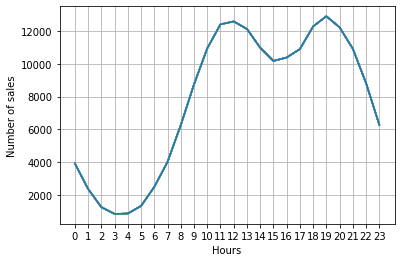

In [28]:
#Criando uma tabela
hours = [hour for hour, df in all_data.groupby('Hour')]

plt.plot(hours, all_data.groupby('Hour').count())
plt.xticks(hours)
plt.xlabel('Hours')
plt.ylabel('Number of sales')
plt.grid()
plt.show()

O melhor horário seria mais ou menos as 11 ou as 19, pois acontecem um pouco antes dos picos normais de vendas, vai de cada negócio, também é importante ressaltar que cada cidade pode ter um pico de vendas em horários diferentes.

De qualquer forma, saber a teoria sobre como o negócio funciona é a melhor maneira de se tirar insights sobre os gráficos.

#**Questão 4:** Que produtos são mais vendidos em conjunto?

In [29]:
#Passo 1: Criar um dataframe com aquelas vendas com ID repetido
df_dupli = all_data[all_data['Order ID'].duplicated(keep=False)] #Esse false é para manter todos...

#Passo 2: Agrupar por Order ID e Produto, passando uma função que vai juntar em uma nova coluna
# os produtos que tiverem o mesmo ID. OBS: Rever essa linha e ver direitin o que ela faz.
df_dupli['Grouped'] = df_dupli.groupby('Order ID')['Product'].transform(lambda x: ','.join(x)) #Vai parecer uma mensagem, mas tudo bem.

#Passo 3: Apagaremos as duplicatas, para não aparecer os mesmos produtos mais de uma vez
df_dupli = df_dupli[['Order ID', 'Grouped']].drop_duplicates()  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [30]:
df_dupli

,Order ID,Grouped
9,278806,"Bose SoundSport Headphones,ThinkPad Laptop"
15,278811,"Wired Headphones,Apple Airpods Headphones"
24,278819,"iPhone,Apple Airpods Headphones"
39,278833,"iPhone,Lightning Charging Cable"
47,278840,"Bose SoundSport Headphones,27in FHD Monitor"
...,...,...
186710,319536,"Macbook Pro Laptop,Wired Headphones"
186731,319556,"Google Phone,Wired Headphones"
186760,319584,"iPhone,Wired Headphones"
186773,319596,"iPhone,Lightning Charging Cable"


In [31]:
#https://stackoverflow.com/questions/52195887/counting-unique-pairs-of-numbers-into-a-python-dictionary

from itertools import combinations
from collections import Counter

#Criar o contador
count = Counter()

#Para cada linha em df_dupli['Grouped'] criar uma sublista row_list, separando as linhas por ','
#Então irá adicionar +1 no contador para cada item repetido na lista
for row in df_dupli['Grouped']:
  row_list = row.split(',')
  count.update(Counter(combinations(row_list,2)))  #Esse 2 é o número de itens comprados juntos, testa 3 depois...
  

count.most_common(10)

[(('iPhone', 'Lightning Charging Cable'), 1005),
 (('Google Phone', 'USB-C Charging Cable'), 987),
 (('iPhone', 'Wired Headphones'), 447),
 (('Google Phone', 'Wired Headphones'), 414),
 (('Vareebadd Phone', 'USB-C Charging Cable'), 361),
 (('iPhone', 'Apple Airpods Headphones'), 360),
 (('Google Phone', 'Bose SoundSport Headphones'), 220),
 (('USB-C Charging Cable', 'Wired Headphones'), 160),
 (('Vareebadd Phone', 'Wired Headphones'), 143),
 (('Lightning Charging Cable', 'Wired Headphones'), 92)]

**Interessante para criar promoções e propagandas.**

#**Questão 5:** Qual foi o produto mais vendido? Qual o motivo que você pensa para esse ser o item mais vendido? 

In [32]:
#Simples, groupby, olhe o quantity ordered

product_group = all_data.groupby('Product')
product_group.sum()

quantity_ordered = product_group.sum()['Quantity Ordered']

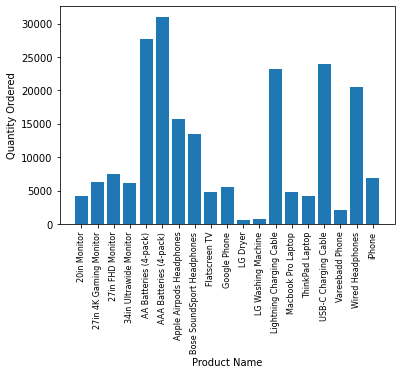

In [33]:
products = [product for product, df in product_group] 

plt.bar(products, quantity_ordered)
plt.xticks(products, rotation = "vertical", size = 8)
plt.ylabel("Quantity Ordered")
plt.xlabel("Product Name")
plt.show()

Baterias, cabos de carregador e fones foram os mais vendidos, são os mais baratos e os que se gastam mais fácil/quebram mais, porém o que eu acho não é suficiente para provar, tenho que me basear em mais

In [34]:
prices = all_data.groupby('Product').mean()['Price Each']
print(prices)

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64


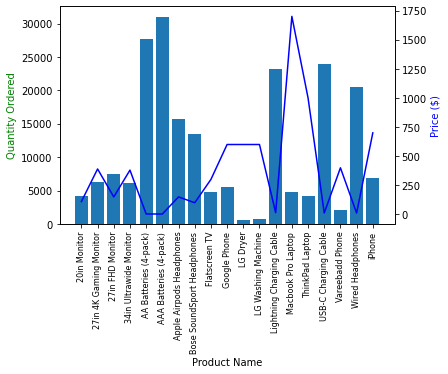

In [35]:
#Usando o google para encontrar como colocar uma segunda coluna em um gráfico matplotlib


fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.bar(products, quantity_ordered)
ax2.plot(products, prices, 'b-')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')
ax1.set_xticklabels(products, rotation = "vertical", size = 8)

plt.show()


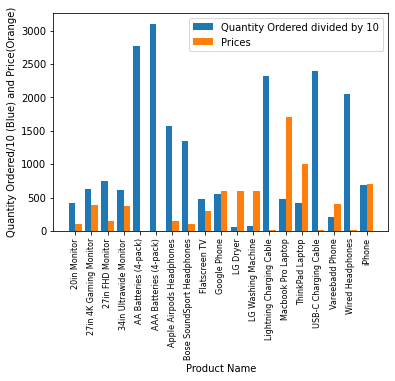

In [36]:
#Testando colocar outra coluna, o gráfico anterior não ficou bom
#https://www.geeksforgeeks.org/plotting-multiple-bar-charts-using-matplotlib-in-python/

X = products
Y = quantity_ordered /10
Z = prices
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, Y, 0.4, label = 'Quantity Ordered divided by 10')
plt.bar(X_axis + 0.2, Z, 0.4, label = 'Prices')
  
plt.xticks(X_axis, X, rotation = "vertical", size = 8)
#plt.xticks(products, rotation = "vertical", size = 8)
plt.xlabel('Product Name')
plt.ylabel('Quantity Ordered/10 (Blue) and Price(Orange)')
plt.legend()
plt.show()

Tente refazer tudo, fazer outros agrupamentos, faça outras perguntas, crie gráficos melhores, aprimore tudo.